In [2]:
# INTRODUCING DATAFRAMES

import pandas as pd

names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]
my_dict = {'country': names, 'drives_right': dr, 'cars_per_cap': cpc}

cars = pd.DataFrame(my_dict)

In [3]:
cars.shape    # this is an attribute 
cars.info()
cars.describe()    # quick statistics for the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       7 non-null      object
 1   drives_right  7 non-null      bool  
 2   cars_per_cap  7 non-null      int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 247.0+ bytes


,cars_per_cap
count,7.000000
mean,351.571429
std,345.595552
min,18.000000
25%,57.500000
50%,200.000000
75%,659.500000
max,809.000000


In [4]:
# Parts of a DataFrame
cars.index
cars.columns
cars.values

array([['United States', True, 809],
       ['Australia', False, 731],
       ['Japan', False, 588],
       ['India', False, 18],
       ['Russia', True, 200],
       ['Morocco', True, 70],
       ['Egypt', True, 45]], dtype=object)

In [5]:
# Sorting rows
cars.sort_values("cars_per_cap", ascending = True)
cars.sort_values(["country", "drives_right"], ascending = [True, False])

,country,drives_right,cars_per_cap
1,Australia,False,731
6,Egypt,True,45
3,India,False,18
2,Japan,False,588
5,Morocco,True,70
4,Russia,True,200
0,United States,True,809


In [6]:
# Subsetting colums 
cars[["country","drives_right"]]    # select two colums
cars["cars_per_cap"] > 500    # display booleans
cars[cars["cars_per_cap"] > 500]    # filtering


,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588


In [7]:
# Subsetting based on multiple conditions
drives_right = cars.loc[(cars["drives_right"] == 'False')]
cars_per_cap_500 = cars.loc[(cars["cars_per_cap"] > 500)]

cars[drives_right & cars_per_cap_500]

,country,drives_right,cars_per_cap
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN


In [8]:
# Subsetting using .isin()
japan_and_us = cars["country"].isin(["Japan", "Australia"])
cars[japan_and_us]

,country,drives_right,cars_per_cap
1,Australia,False,731
2,Japan,False,588


In [9]:
# Adding new columns
cars["COUNTRY"] = cars["country"].str.upper()
cars


,country,drives_right,cars_per_cap,COUNTRY
0,United States,True,809,UNITED STATES
1,Australia,False,731,AUSTRALIA
2,Japan,False,588,JAPAN
3,India,False,18,INDIA
4,Russia,True,200,RUSSIA
5,Morocco,True,70,MOROCCO
6,Egypt,True,45,EGYPT


In [10]:
# SUMMARRY STATISTICS 

cars["cars_per_cap"].mean()
cars["cars_per_cap"].median()
cars["cars_per_cap"].max()
cars["cars_per_cap"].min()
cars["cars_per_cap"].mode()
cars["cars_per_cap"].var()
cars["cars_per_cap"].std()

345.59555222005633

In [11]:
# The .agg() method
# allows you to apply your own custom functions to a DataFrame

def pct30(column):
    return column.quantile(0.3)
def pct50(column):
    return column.quantile(0.5)

cars["cars_per_cap"].agg([pct30, pct50])    # can imply to multiples columns

pct30     65.0
pct50    200.0
Name: cars_per_cap, dtype: float64

In [12]:
# Cumulative sum
cars["cars_per_cap"].cumsum()

0     809
1    1540
2    2128
3    2146
4    2346
5    2416
6    2461
Name: cars_per_cap, dtype: int64

In [13]:
# Counting

# Drop duplicate names
cars.drop_duplicates(subset="drives_right")    # subset = determine the criteria, can be multiple

,country,drives_right,cars_per_cap,COUNTRY
0,United States,True,809,UNITED STATES
1,Australia,False,731,AUSTRALIA


In [14]:
cars["country"].value_counts()   
cars["drives_right"].value_counts(sort=True) 

True     4
False    3
Name: drives_right, dtype: int64

In [15]:
# Proportions
cars["drives_right"].value_counts(normalize=True) 

True     0.571429
False    0.428571
Name: drives_right, dtype: float64

In [16]:
# Grouped summary statistics 
cars[cars["drives_right"] == True]["cars_per_cap"].mean()
# and more elegant...
cars.groupby("drives_right")["cars_per_cap"].mean()

drives_right
False    445.666667
True     281.000000
Name: cars_per_cap, dtype: float64

In [17]:
# Can be combined with the agg method
cars.groupby("drives_right")["cars_per_cap"].agg([min, max, sum])

,min,max,sum
drives_right,,,
False,18,731,1337
True,45,809,1124


In [18]:
cars.groupby(["drives_right","country"])["cars_per_cap"].mean()

drives_right  country      
False         Australia        731.0
              India             18.0
              Japan            588.0
True          Egypt             45.0
              Morocco           70.0
              Russia           200.0
              United States    809.0
Name: cars_per_cap, dtype: float64

In [19]:
# Pivot Tables 

cars.pivot_table(values="cars_per_cap", index="drives_right")    # values=summarized data, index=column you want to group
# NB: mean is the default displayed value

,cars_per_cap
drives_right,
False,445.666667
True,281.000000


In [20]:
import numpy as np
cars.pivot_table(values="cars_per_cap", index="drives_right", aggfunc=[np.mean, np.median])    # aggfunc to change the nature of the statistics

,mean,median
,cars_per_cap,cars_per_cap
drives_right,,
False,445.666667,588
True,281.000000,135


In [21]:
# Pivot on two variables
cars.pivot_table(values="cars_per_cap", index="drives_right", columns="country", fill_value=0, margins=True)
# fill value to replace the NaN
# margin = mean value of all row/colum elements

country,Australia,Egypt,India,Japan,Morocco,Russia,United States,All
drives_right,,,,,,,,
False,731,0,18,588,0,0,0,445.666667
True,0,45,0,0,70,200,809,281.000000
All,731,45,18,588,70,200,809,351.571429


In [22]:
# EXPLICIT INDEXES

cars_ind = cars.set_index("country")   # setting a column as the index
cars_ind


,drives_right,cars_per_cap,COUNTRY
country,,,
United States,True,809,UNITED STATES
Australia,False,731,AUSTRALIA
Japan,False,588,JAPAN
India,False,18,INDIA
Russia,True,200,RUSSIA
Morocco,True,70,MOROCCO
Egypt,True,45,EGYPT


In [23]:
cars_ind.reset_index()   # reset the index 
# drop = True as a parameter removes definitely the index set

,country,drives_right,cars_per_cap,COUNTRY
0,United States,True,809,UNITED STATES
1,Australia,False,731,AUSTRALIA
2,Japan,False,588,JAPAN
3,India,False,18,INDIA
4,Russia,True,200,RUSSIA
5,Morocco,True,70,MOROCCO
6,Egypt,True,45,EGYPT


In [24]:
# Indexes make subsetting simpler
cars_ind.loc[["Australia","Japan"]]   # example with loc

,drives_right,cars_per_cap,COUNTRY
country,,,
Australia,False,731,AUSTRALIA
Japan,False,588,JAPAN


In [25]:
# Multi-level indexes
cars_ind2 = cars.set_index(["country","drives_right"])   # note the []
cars_ind2

,,cars_per_cap,COUNTRY
country,drives_right,,
United States,True,809,UNITED STATES
Australia,False,731,AUSTRALIA
Japan,False,588,JAPAN
India,False,18,INDIA
Russia,True,200,RUSSIA
Morocco,True,70,MOROCCO
Egypt,True,45,EGYPT


In [26]:
# Subset inner levels with a list of tuples
cars_ind2.loc[[("Australia", False), ("Japan", False)]]

,,cars_per_cap,COUNTRY
country,drives_right,,
Australia,False,731,AUSTRALIA
Japan,False,588,JAPAN


In [27]:
# Sorting by index values
cars_ind2.sort_index(level=["country", "drives_right"], ascending=[False, False])

,,cars_per_cap,COUNTRY
country,drives_right,,
United States,True,809,UNITED STATES
Russia,True,200,RUSSIA
Morocco,True,70,MOROCCO
Japan,False,588,JAPAN
India,False,18,INDIA
Egypt,True,45,EGYPT
Australia,False,731,AUSTRALIA


In [28]:
# SLICING AND SUBSETTING WITH .LOC AND .ILOC

# Before slicing, a df should be sorted !!!
cars_ind2_srt=cars_ind2.sort_index()
cars_ind2_srt

,,cars_per_cap,COUNTRY
country,drives_right,,
Australia,False,731,AUSTRALIA
Egypt,True,45,EGYPT
India,False,18,INDIA
Japan,False,588,JAPAN
Morocco,True,70,MOROCCO
Russia,True,200,RUSSIA
United States,True,809,UNITED STATES


In [29]:
# Slicing the outer index level with loc

cars_ind2_srt.loc["Australia":"Japan"]   # The index MUST be sorted for the loc to work
cars_ind2_srt.loc[("Australia", False):("Japan", False)]   # Works similarly

,,cars_per_cap,COUNTRY
country,drives_right,,
Australia,False,731,AUSTRALIA
Egypt,True,45,EGYPT
India,False,18,INDIA
Japan,False,588,JAPAN


In [30]:
# Slicing columns

cars_ind2_srt.loc[:, "cars_per_cap"] 

country        drives_right
Australia      False           731
Egypt          True             45
India          False            18
Japan          False           588
Morocco        True             70
Russia         True            200
United States  True            809
Name: cars_per_cap, dtype: int64

In [31]:
# Slice twice

cars_ind2_srt.loc[("Australia", False):("Japan", False), "cars_per_cap":"COUNTRY"] 

,,cars_per_cap,COUNTRY
country,drives_right,,
Australia,False,731,AUSTRALIA
Egypt,True,45,EGYPT
India,False,18,INDIA
Japan,False,588,JAPAN


In [32]:
# Other slicing methods

cars=cars.set_index("cars_per_cap").sort_index(ascending=True)
cars

,country,drives_right,COUNTRY
cars_per_cap,,,
18,India,False,INDIA
45,Egypt,True,EGYPT
70,Morocco,True,MOROCCO
200,Russia,True,RUSSIA
588,Japan,False,JAPAN
731,Australia,False,AUSTRALIA
809,United States,True,UNITED STATES


In [33]:
cars.loc[200:800]

,country,drives_right,COUNTRY
cars_per_cap,,,
200,Russia,True,RUSSIA
588,Japan,False,JAPAN
731,Australia,False,AUSTRALIA


In [34]:
# Subsetting row/column with iloc

cars_ind2_srt.iloc[0:3, 1:]    # 1st argument for row, 2nd for column

,,COUNTRY
country,drives_right,
Australia,False,AUSTRALIA
Egypt,True,EGYPT
India,False,INDIA


In [35]:
# Working with pivot tables

file_name = 'close_spi2c.csv'
spi20_df = pd.read_csv(file_name, sep=";")

In [36]:
spi20_pivot = spi20_df.pivot_table("Weight", index="Free_Float", columns="ICB", aggfunc=[np.sum])
spi20_pivot

sum                                                        \
ICB            1300     2300     2700      3500    3700      4500    6500   
Free_Float                                                                  
0.4905          NaN      NaN      NaN       NaN     NaN       NaN  1.2446   
0.8272          NaN      NaN  4.23911       NaN     NaN       NaN     NaN   
0.8300          NaN      NaN      NaN       NaN     NaN   1.05158     NaN   
0.8497          NaN      NaN      NaN       NaN     NaN       NaN     NaN   
0.8614      1.90895      NaN      NaN       NaN     NaN       NaN     NaN   
0.8919          NaN      NaN      NaN       NaN     NaN       NaN     NaN   
0.9012          NaN      NaN      NaN       NaN     NaN       NaN     NaN   
0.9103          NaN      NaN      NaN       NaN     NaN       NaN     NaN   
0.9160          NaN  2.74542      NaN       NaN     NaN       NaN     NaN   
0.9491          NaN      NaN      NaN       NaN     NaN       NaN     NaN   
0.9499          NaN  1.43408      NaN       NaN     NaN       NaN     NaN   
0.9500          NaN      NaN      NaN       NaN     NaN  14.47185     NaN   
1.0000          NaN  3.33050      NaN  24.94778  6.1912  21.62323     NaN   

                                       
ICB            8500     8700     9500  
Free_Float                             
0.4905          NaN      NaN      NaN  
0.8272          NaN      NaN      NaN  
0.8300          NaN      NaN      NaN  
0.8497          NaN  1.52191      NaN  
0.8614          NaN      NaN      NaN  
0.8919          NaN  4.88086      NaN  
0.9012          NaN  0.68396      NaN  
0.9103      2.24417      NaN      NaN  
0.9160          NaN      NaN      NaN  
0.9491          NaN      NaN  0.67987  
0.9499          NaN      NaN      NaN  
0.9500          NaN      NaN      NaN  
1.0000      6.80094      NaN      NaN

In [37]:
# .loc + slicing is a power combo

spi20_pivot.loc["0.4905":"0.9012"]

sum                                                         \
ICB            1300 2300     2700 3500 3700     4500    6500 8500     8700   
Free_Float                                                                   
0.4905          NaN  NaN      NaN  NaN  NaN      NaN  1.2446  NaN      NaN   
0.8272          NaN  NaN  4.23911  NaN  NaN      NaN     NaN  NaN      NaN   
0.8300          NaN  NaN      NaN  NaN  NaN  1.05158     NaN  NaN      NaN   
0.8497          NaN  NaN      NaN  NaN  NaN      NaN     NaN  NaN  1.52191   
0.8614      1.90895  NaN      NaN  NaN  NaN      NaN     NaN  NaN      NaN   
0.8919          NaN  NaN      NaN  NaN  NaN      NaN     NaN  NaN  4.88086   
0.9012          NaN  NaN      NaN  NaN  NaN      NaN     NaN  NaN  0.68396   

                 
ICB        9500  
Free_Float       
0.4905      NaN  
0.8272      NaN  
0.8300      NaN  
0.8497      NaN  
0.8614      NaN  
0.8919      NaN  
0.9012      NaN

In [38]:
# The axis argument

spi20_pivot.mean(axis='index')   # Index is the default value  

     ICB 
sum  1300     1.908950
     2300     2.503333
     2700     4.239110
     3500    24.947780
     3700     6.191200
     4500    12.382220
     6500     1.244600
     8500     4.522555
     8700     2.362243
     9500     0.679870
dtype: float64

In [39]:
spi20_pivot.mean(axis='columns')

Free_Float
0.4905     1.24460
0.8272     4.23911
0.8300     1.05158
0.8497     1.52191
0.8614     1.90895
0.8919     4.88086
0.9012     0.68396
0.9103     2.24417
0.9160     2.74542
0.9491     0.67987
0.9499     1.43408
0.9500    14.47185
1.0000    12.57873
dtype: float64

In [40]:
spi20_pivot_mean_per_float = spi20_pivot.mean(axis='columns')
spi20_pivot_mean_per_float

Free_Float
0.4905     1.24460
0.8272     4.23911
0.8300     1.05158
0.8497     1.52191
0.8614     1.90895
0.8919     4.88086
0.9012     0.68396
0.9103     2.24417
0.9160     2.74542
0.9491     0.67987
0.9499     1.43408
0.9500    14.47185
1.0000    12.57873
dtype: float64

In [41]:
spi20_pivot_mean_per_float_max = spi20_pivot_mean_per_float[spi20_pivot_mean_per_float.values == spi20_pivot_mean_per_float.max()]
spi20_pivot_mean_per_float_max

Free_Float
0.95    14.47185
dtype: float64

In [57]:
# VISUALIZING YOUR DATA

import pandas as pd
import matplotlib.pyplot as plt
file_name = 'Score de sommeil.csv'

score_sommeil = pd.read_csv(file_name, index_col=["Date"])

In [58]:
score_sommeil.head()

,Score
Date,
3 août,83
10 août,72
17 août,46
24 août,77
31 août,70


<Axes: >

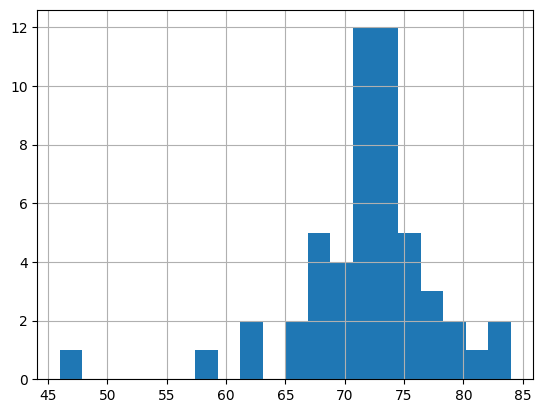

In [62]:
score_sommeil["Score"].hist(bins=20)    # bins=number of bars

In [64]:
# Bar plots

file_name = 'england-premier-league-players-2018-to-2019-stats.csv'
PLplayer = pd.read_csv(file_name)

In [68]:
avg_age_per_appearance = PLplayer.groupby("age")["appearances_overall"].mean()   # useful to get summary statistics 
avg_age_per_appearance

age
21     3.200000
22     4.666667
23     6.900000
24     8.142857
25    14.225000
26    20.064516
27    15.483871
28    22.847826
29    23.391304
30    22.509434
31    23.153846
32    20.813953
33    23.795455
34    19.483871
35    18.266667
36    18.562500
37    17.500000
38    21.333333
39    11.142857
40     4.500000
41     2.666667
42    13.000000
43     1.000000
Name: appearances_overall, dtype: float64

<Axes: title={'center': 'Mean # appearance per age'}, xlabel='age'>

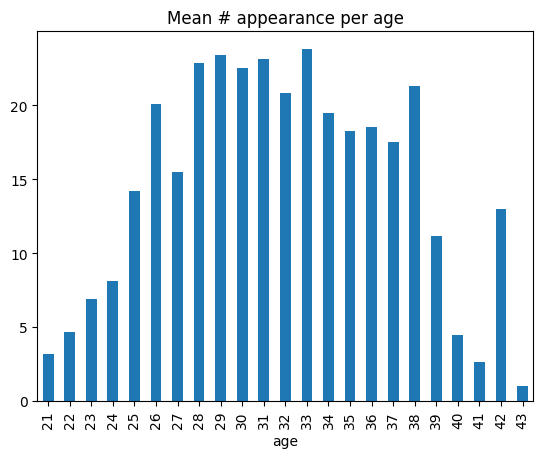

In [71]:
avg_age_per_appearance.plot(kind="bar",
                            title="Mean # appearance per age")

<Axes: xlabel='Date'>

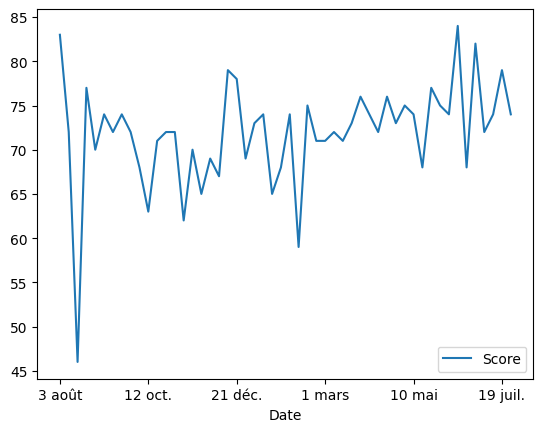

In [79]:
# Line plots

score_sommeil.plot(y="Score",kind="line")

<Axes: xlabel='Date'>

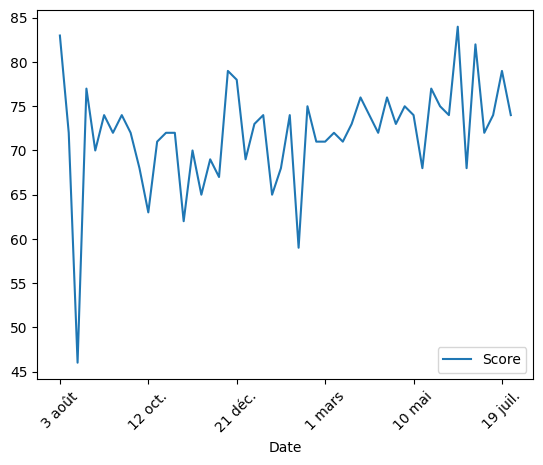

In [81]:
# Rotating axis label

score_sommeil.plot(y="Score",kind="line",rot=45)

<Axes: xlabel='minutes_played_overall', ylabel='minutes_played_away'>

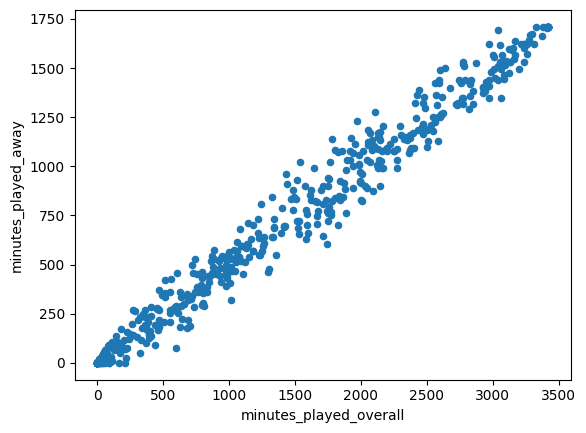

In [87]:
# Scatter plots

PLplayer.plot("minutes_played_overall","minutes_played_away",kind="scatter")   # Useful to determine correlation between variables



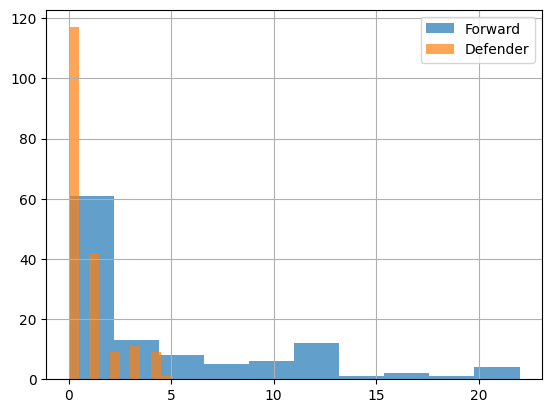

In [91]:
# Layering plots

PLplayer[PLplayer["position"]=="Forward"]["goals_overall"].hist(alpha=0.7)
PLplayer[PLplayer["position"]=="Defender"]["goals_overall"].hist(alpha=0.7)
plt.legend(["Forward", "Defender"])